In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# check for required file
FILE_PATH = '../data/Mental_Health_Service_Finder_Data_Cleaned_Reduced.csv'

file_path = Path(FILE_PATH)

# Check if the file exists
if file_path.exists():
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}. Please ensure the file is downloaded correctly.")

    # Load the dataset
initial_df = pd.read_csv(FILE_PATH)

File found: ../data/Mental_Health_Service_Finder_Data_Cleaned_Reduced.csv


In [2]:
initial_df.head()

,HIV Services,Domestic Violence Services,Child Services,Youth and Adolescent Services,Adult Services,Senior Services,Substance Abuse Services,Military Services,Inpatient Services,Residential Program,name_2,city,latitude,longitude,service_count
0,1,0,0,1,0,0,0,0,0,0,Queens Opioid Treatment Clinic Otp 3,NEW YORK,40.835269,-73.940293,2
1,0,0,0,1,0,0,0,0,0,0,Ny Center Addiction Treatment Op 1,BROOKLYN,40.671835,-73.997069,1
2,0,0,0,1,0,0,0,0,0,0,Bleuler Cd Recovery Services Op,QUEENS,40.748278,-73.891721,1
3,0,0,1,1,1,1,0,0,0,0,Bleuler Cd Recovery Services Op,QUEENS,40.723370,-73.848295,4
4,0,0,1,1,1,0,0,0,0,0,Family Life Clinic,QUEENS,40.673769,-73.775951,3


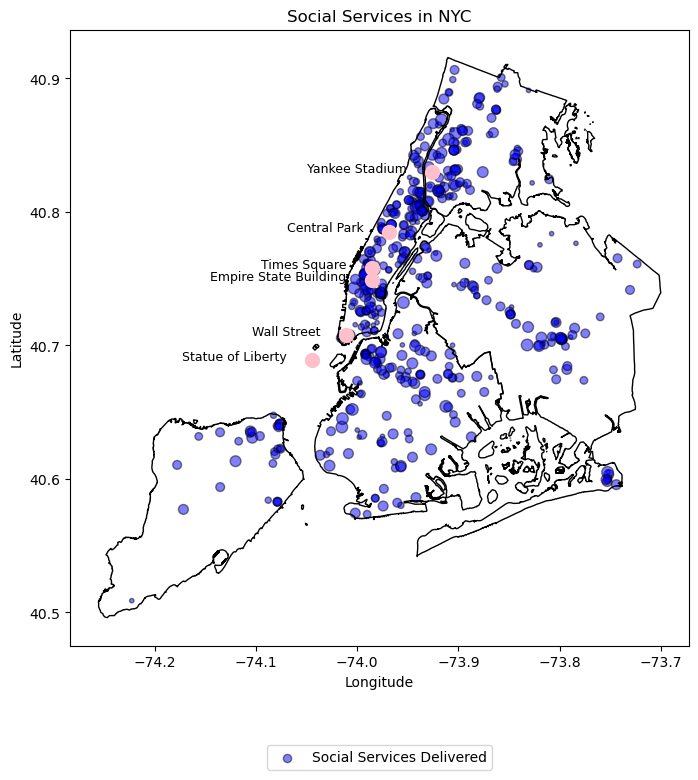

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile containing the borough boundaries
boroughs = gpd.read_file('../mappings/boundaries/boundaries.shp')

# Ensure the coordinate reference system (CRS) matches between your shapefile and your data
boroughs = boroughs.to_crs(epsg=4326)  # EPSG:4326 is commonly used for lat/lon data

# Load the landmarks data
landmarks_df = pd.read_csv('../mappings/nyc_landmarks.csv')

# Your existing data for services
latitudes = initial_df['latitude']
longitudes = initial_df['longitude']
service_counts = initial_df['service_count']

# Create the scatter plot for services with scaled marker sizes
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, c='blue', alpha=0.5, edgecolor='k', label='Social Services Delivered', s=service_counts * 10)

# Plot the borough boundaries
boroughs.plot(ax=plt.gca(), edgecolor='black', facecolor='none', linewidth=1)

# Plot each landmark with its respective color without adding it to the legend
for index, row in landmarks_df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], c='pink', label='_nolegend_', s=100)
    plt.text(row['Longitude'] - 0.025, row['Latitude'], row['Place'], fontsize=9, ha='right')

# Adding titles and labels
plt.title('Social Services in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Place the legend below the map
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.show()


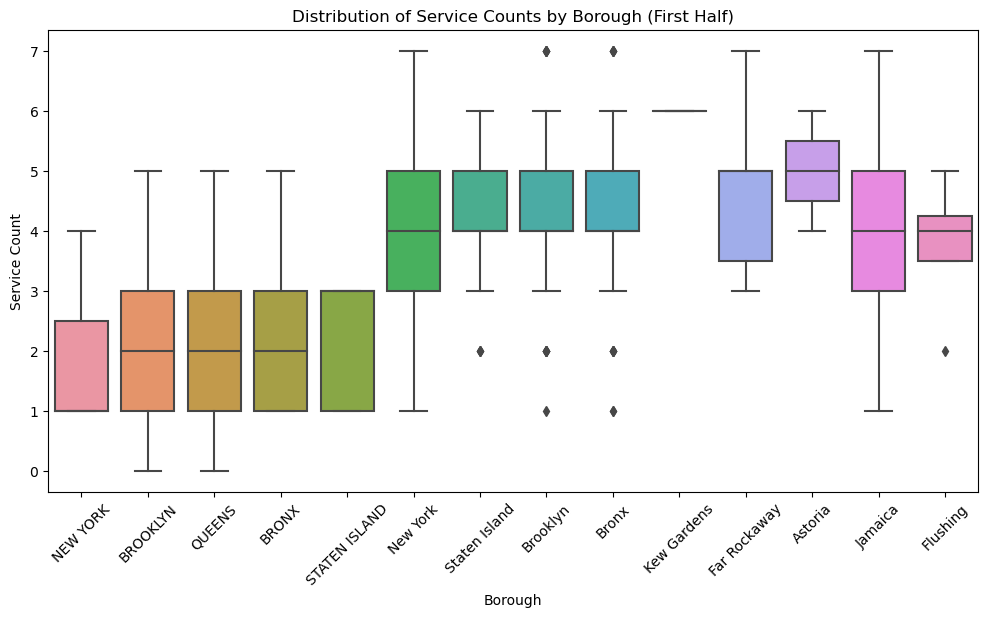

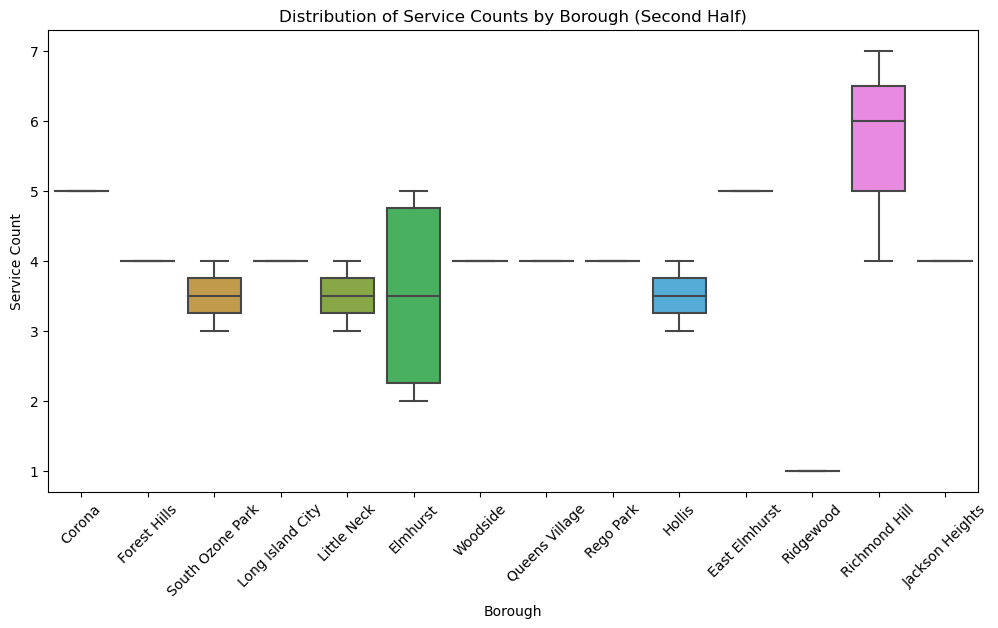

In [4]:
import seaborn as sns
# Get unique boroughs and split them
unique_boroughs = initial_df['city'].unique()
mid_point = len(unique_boroughs) // 2
boroughs_first_half = unique_boroughs[:mid_point]
boroughs_second_half = unique_boroughs[mid_point:]

# Filter the DataFrame into two parts
df_first_half = initial_df[initial_df['city'].isin(boroughs_first_half)]
df_second_half = initial_df[initial_df['city'].isin(boroughs_second_half)]

# Plotting the first half
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='service_count', data=df_first_half)
plt.title('Distribution of Service Counts by Borough (First Half)')
plt.xlabel('Borough')
plt.ylabel('Service Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

# Plotting the second half
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='service_count', data=df_second_half)
plt.title('Distribution of Service Counts by Borough (Second Half)')
plt.xlabel('Borough')
plt.ylabel('Service Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

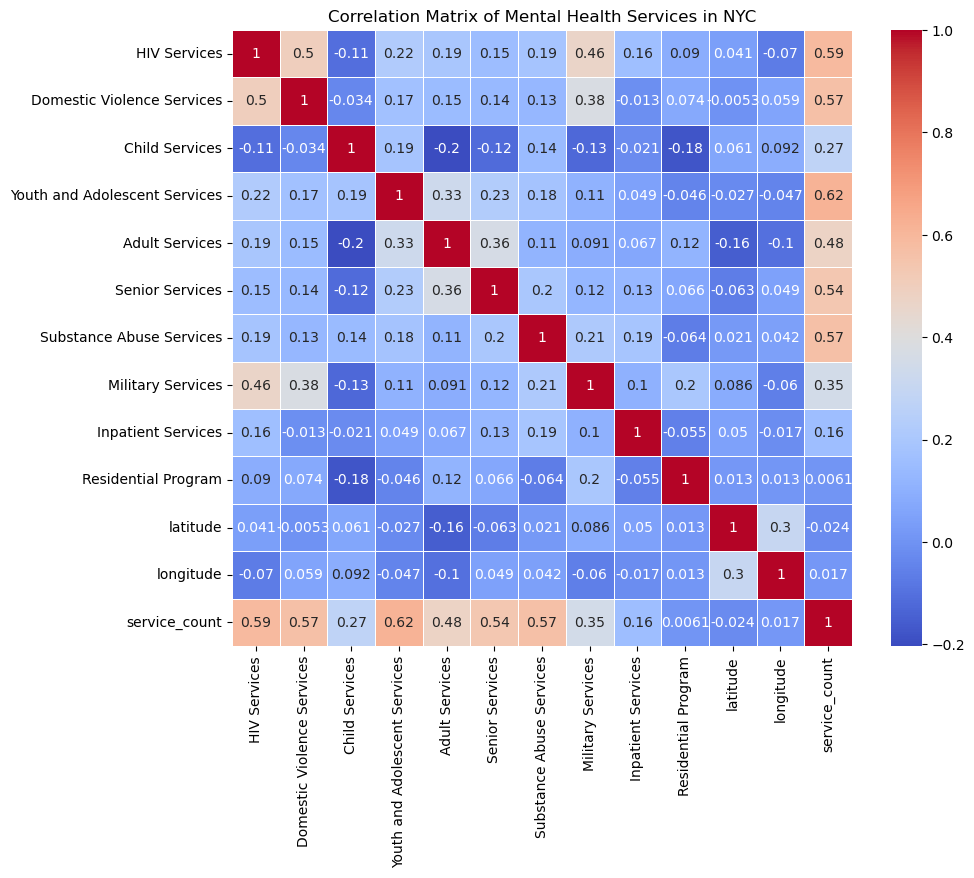

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for the correlation matrix
numeric_df = initial_df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Mental Health Services in NYC')
plt.show()


In [6]:
# High Correlation Between Certain Services:
# HIV Services and Domestic Violence Services (0.5): There is a moderately strong positive correlation 
# between the availability of HIV services and domestic violence services, suggesting that areas with 
# one of these services tend to have the other as well.

# Low Correlation:
# Latitude and Longitude with Services: The very low correlations here (close to 0) suggest that 
# geographic location (at least in terms of latitude and longitude) does not strongly influence the 
# availability of most service types in your dataset.

In [7]:
# Hypothesis: Areas with HIV services are more likely to have domestic violence services available.
from scipy.stats import chi2_contingency

# Create a contingency table of HIV Services vs Domestic Violence Services
contingency_table = pd.crosstab(initial_df['HIV Services'], initial_df['Domestic Violence Services'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant association between HIV Services and Domestic Violence Services.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between HIV Services and Domestic Violence Services.")


Chi-Square Statistic: 119.15394350038122
p-value: 9.69090724224651e-28
Reject the null hypothesis: There is a significant association between HIV Services and Domestic Violence Services.


In [8]:
# Hypothesis:
# Mental health services specifically designed for children are more 
# likely to be available in areas with a higher concentration of senior services.

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(initial_df['Senior Services'], initial_df['Child Services'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

Chi-Square Statistic: 6.223496178052211
p-value: 0.012606593347619068


In [9]:
# Since the p-value is approximately 0.012, which is less than the conventional threshold of 0.05, 
# we can reject the null hypothesis.

# This result supports the hypothesis that areas with a higher concentration of senior services are 
# more likely to also have services designed for children. It suggests that these two types of services 
# tend to coexist in the same locations, which might be due to overlapping community resources, policies, 
# or the comprehensive care strategies employed by the service providers in those areas.